# Name:
## Kala Sri Naga Sai Gopala Krishna


# Read the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_excel('Volve.xlsx', sheet_name = 'well 2')

In [3]:
df2 = pd.read_excel('Volve.xlsx', sheet_name = 'well 3')

In [4]:
df = pd.concat([df1, df2], axis=0)

In [5]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN


In [6]:
df

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN
...,...,...,...,...,...,...,...
1154,4083.5,15,59.7060,1.7590,2.4851,0.1416,CB
1155,4084.0,15,58.4170,1.6510,2.4860,0.1416,CB
1156,4084.5,15,57.4990,1.5970,2.5311,0.1527,CB
1157,4085.0,15,56.7850,1.4820,2.4731,0.1785,CB


In [7]:
df.describe()

,Depth,Well,GR,RT,RHOB,NPHI
count,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000
mean,3733.609380,14.357606,51.379917,4.292569,2.432688,0.207456
std,265.253354,0.479369,57.700965,14.524740,0.147662,0.104241
min,3178.500000,14.000000,3.655000,0.094000,1.805100,0.013500
25%,3542.000000,14.000000,17.433000,1.014000,2.311000,0.133600
50%,3747.500000,14.000000,34.083600,1.864900,2.459000,0.187900
75%,3950.500000,15.000000,71.846000,3.697700,2.550000,0.267500
max,4220.500000,15.000000,1567.590000,461.170000,3.149300,0.853200


In [8]:
df.isna().any(axis = 0)

Depth     False
Well      False
GR        False
RT        False
RHOB      False
NPHI      False
Facies    False
dtype: bool

# There are no Null Values in the Dataset
# Encoding the target

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Facies']=label_encoder.fit_transform(df['Facies'])

In [129]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the label mapping
print(label_mapping)

{'CB': 0, 'SH': 1, 'SS': 2, 'UN': 3}


In [127]:
df.columns

Index(['Depth', 'Well', 'GR', 'RT', 'RHOB', 'NPHI', 'Facies', 'RTOB', 'RHPI'], dtype='object')

In [128]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RTOB,RHPI
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,0.316028,2.195864
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,3,0.587701,2.174418
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.899481,2.005479
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,3,0.774351,2.015642
5,3181.0,14,49.0612,0.5514,2.2463,0.4549,1,0.213990,2.039366


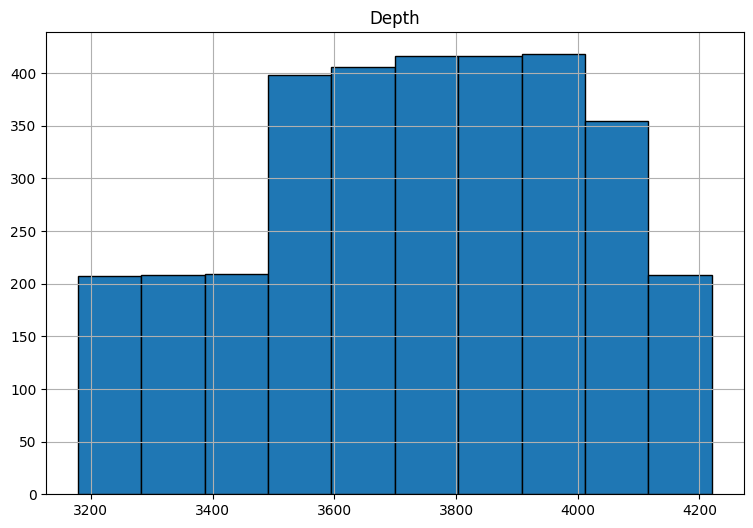

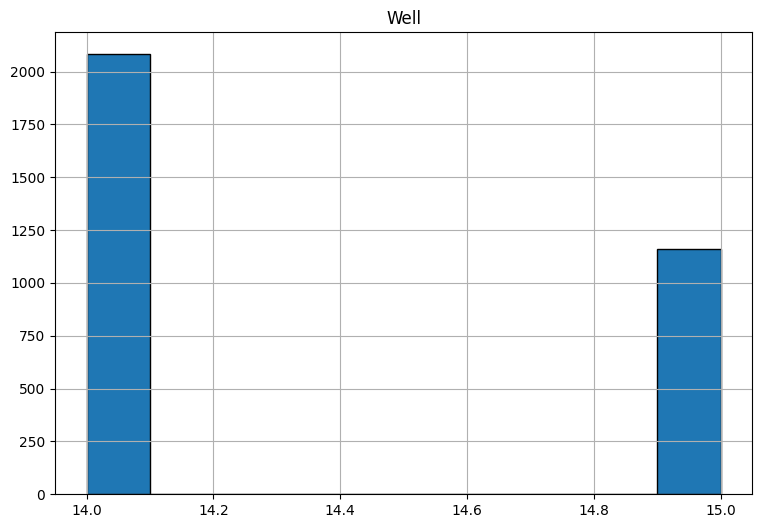

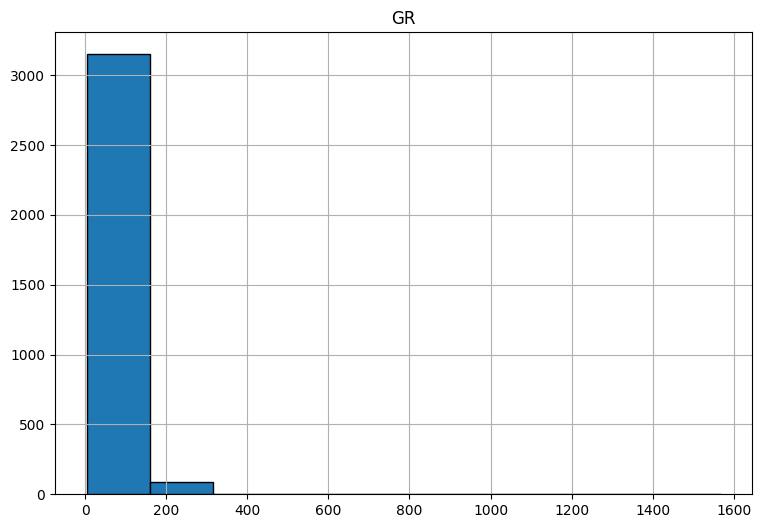

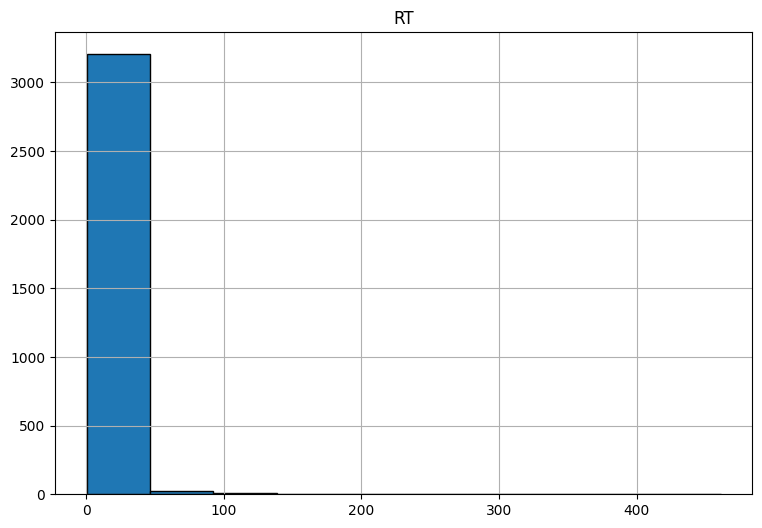

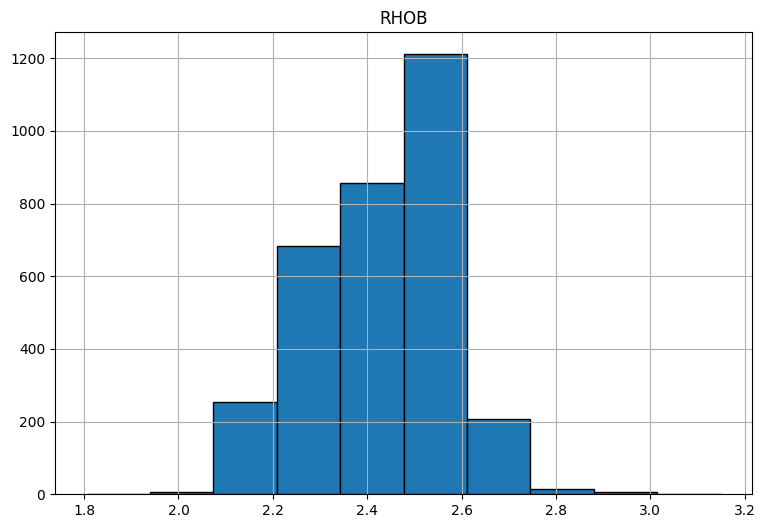

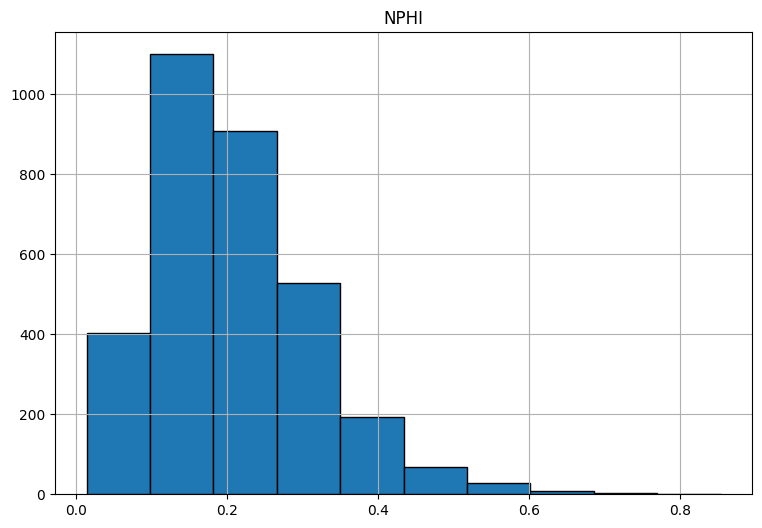

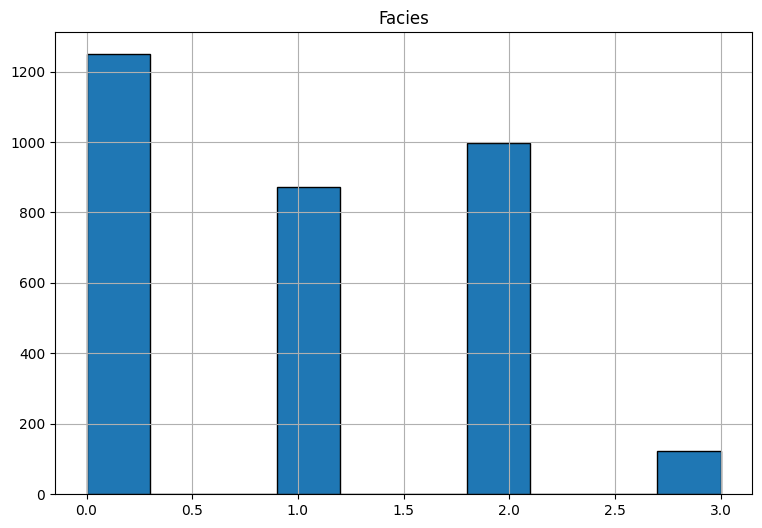

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    plt.figure(figsize=(9, 6))
    #sns.histplot(df[column], kde=True)
    df[column].hist(edgecolor='black')
    plt.title(column)
    plt.show()

In [13]:
#df['GR'] = np.log(df['GR'])
#df['RT'] = np.log(df['RT'])
#df['NPHI'] = np.log(df['NPHI'])


# Creating 2 new features

In [15]:
df['RTOB'] = np.log((df['RT'] * (df['RHOB'])))


In [16]:
df['RHPI'] = df['RHOB'] - (df['NPHI']**2)




In [17]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RTOB,RHPI
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,0.316028,2.195864
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,3,0.587701,2.174418
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.899481,2.005479
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,3,1.180353,1.950877
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,3,0.774351,2.015642


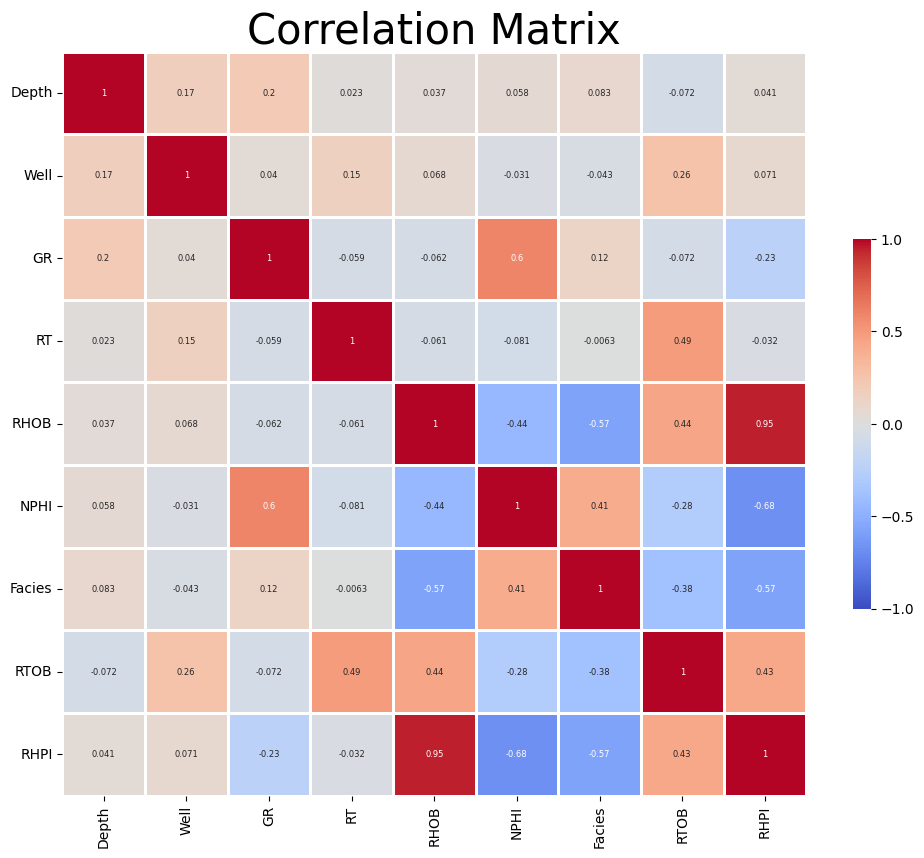

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = df.corr(method = "pearson")

fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix,  square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 10)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =10)
ax.set_title("Correlation Matrix", size = 30)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [19]:
df[df.columns[1:]].corr()['Facies'][:]

Well     -0.043091
GR        0.123834
RT       -0.006271
RHOB     -0.571477
NPHI      0.405681
Facies    1.000000
RTOB     -0.375306
RHPI     -0.571712
Name: Facies, dtype: float64

### As we can see that the two new features created are not weakly correlated with the target

In [20]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RTOB,RHPI
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,0.316028,2.195864
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,3,0.587701,2.174418
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.899481,2.005479
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,3,1.180353,1.950877
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,3,0.774351,2.015642


# Perform all preprocessing: outlier detection, scaling, co-linearity check (Pearson), association
# test (F-test and Mutual Information), and feature transformation (Quantile Transformer). – 2

### Outlier Detection and Removal

In [21]:
from sklearn.ensemble import IsolationForest

In [22]:
outliers_fraction = 0.02

In [23]:
df.shape

(3241, 9)

In [24]:
from sklearn import preprocessing
import seaborn

In [25]:
model =  IsolationForest(n_estimators=300, max_samples = 0.8, max_features= 0.8, contamination = outliers_fraction)

model.fit(df)

C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.02, max_features=0.8, max_samples=0.8,
                n_estimators=300)

In [26]:
model.predict(df)

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
df['anomaly'] = model.predict(df)

In [28]:
df['anomaly'] = df['anomaly'].map( {1: 0, -1: 1})  
                # map 1 to 0 and -1 to 1....so, 1 is outlier

print(df['anomaly'].value_counts())

0    3176
1      65
Name: anomaly, dtype: int64


In [29]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RTOB,RHPI,anomaly
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,0.316028,2.195864,0
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,3,0.587701,2.174418,0
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.899481,2.005479,0
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,3,1.180353,1.950877,1
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,3,0.774351,2.015642,0


In [30]:
df = df[df['anomaly'] != 1]

In [31]:
df.shape

(3176, 10)

In [32]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RTOB,RHPI,anomaly
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,0.316028,2.195864,0
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,3,0.587701,2.174418,0
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.899481,2.005479,0
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,3,0.774351,2.015642,0
5,3181.0,14,49.0612,0.5514,2.2463,0.4549,1,0.213990,2.039366,0


In [33]:
df = df.drop('anomaly', axis =1)

In [34]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RTOB,RHPI
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,0.316028,2.195864
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,3,0.587701,2.174418
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.899481,2.005479
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,3,0.774351,2.015642
5,3181.0,14,49.0612,0.5514,2.2463,0.4549,1,0.213990,2.039366


In [35]:
X = df.drop('Facies', axis =1)

In [36]:
y = df['Facies']

### Splitting data into Training and Testing

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42, stratify=y)

In [38]:
# Create an instance of QuantileTransformer
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(n_quantiles=1000, output_distribution='uniform', random_state=0)

# List of columns to transform
cols_to_transform = X_train.columns

# Apply the Quantile Transformer to the specified columns
X_train[cols_to_transform] = quantile_transformer.fit_transform(X_train[cols_to_transform])

X_test[cols_to_transform] = quantile_transformer.transform(X_test[cols_to_transform])

In [119]:
type(X_test)

pandas.core.frame.DataFrame

## Performing Pearson Correlation and removing features > 0.9 co-linearity

In [39]:
corr_matrix = X_train.corr(method = "pearson")

In [40]:
corr_matrix.head()

,Depth,Well,GR,RT,RHOB,NPHI,RTOB,RHPI
Depth,1.000000,0.154383,0.378210,-0.227245,-0.106162,0.193430,-0.220617,-0.108266
Well,0.154383,1.000000,0.121897,0.212442,0.064462,-0.028431,0.211802,0.069365
GR,0.378210,0.121897,1.000000,-0.263914,-0.241525,0.803216,-0.273568,-0.379308
RT,-0.227245,0.212442,-0.263914,1.000000,0.526236,-0.432393,0.998959,0.524184
RHOB,-0.106162,0.064462,-0.241525,0.526236,1.000000,-0.547074,0.552995,0.974841


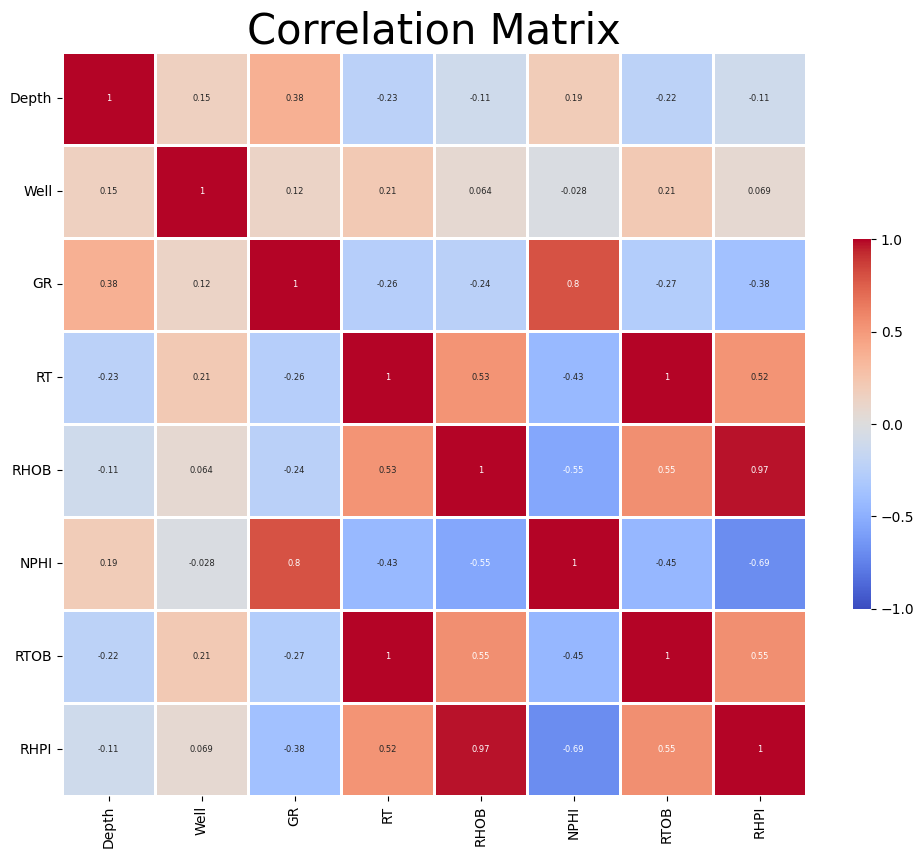

In [41]:
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix,  square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 10)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =10)
ax.set_title("Correlation Matrix", size = 30)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [42]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  ##  indices for the upper-triangle

C:\Users\Gopala Kala\AppData\Local\Temp\ipykernel_17992\2141870208.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


In [43]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

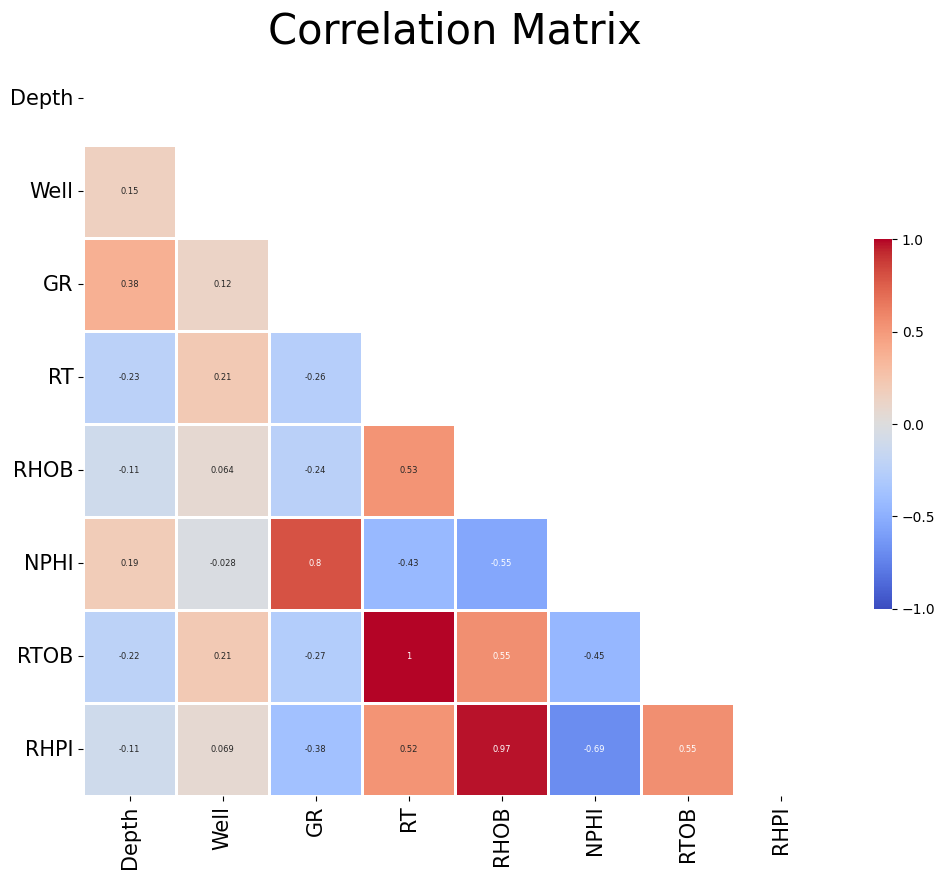

In [44]:
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix, mask = mask, square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 15)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix", size = 30)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [45]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


to_drop = [column for column in upper.columns if any(abs(upper[column]) >= (0.9))]

In [116]:
to_drop

['RTOB', 'RHPI']

In [46]:
X_train.drop(to_drop, axis=1, inplace=True)

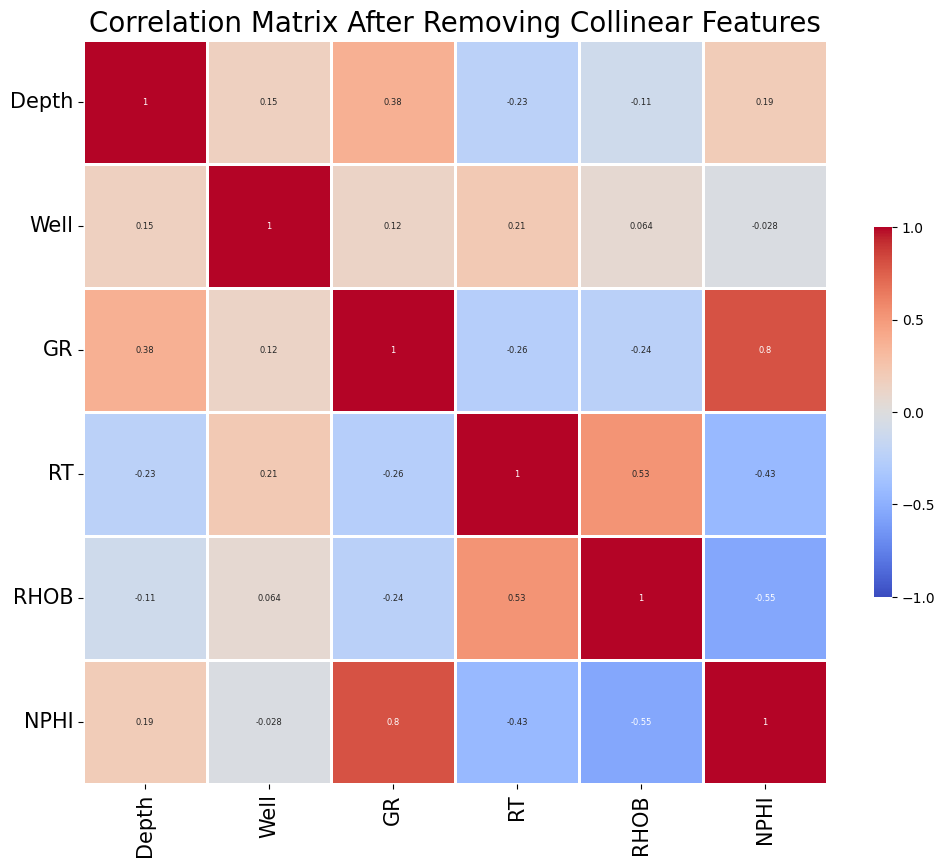

In [47]:
corr_matrix = X_train.corr(method = "pearson")

fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix, square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 15)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix After Removing Collinear Features", size = 20)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Removing correlated features from test data

In [48]:
X_test.drop(to_drop, axis=1, inplace=True)

In [49]:
X_train.head()

,Depth,Well,GR,RT,RHOB,NPHI
154,0.044658,0.0,0.563796,0.101133,0.023530,0.822754
1390,0.655881,0.0,0.946056,0.325325,0.558539,0.903878
1536,0.744830,0.0,0.833642,0.399657,0.618118,0.757792
1152,0.513588,0.0,0.650354,0.667567,0.820821,0.502002
16,0.209091,1.0,0.280050,0.620990,0.611712,0.281227


In [50]:
X_test.head()

,Depth,Well,GR,RT,RHOB,NPHI
1132,0.901420,1.0,0.679642,0.251264,0.312653,0.355629
1072,0.467113,0.0,0.406691,0.713024,0.926927,0.206380
945,0.786392,1.0,0.635371,0.218432,0.248130,0.583694
2007,0.978916,0.0,0.632448,0.633442,0.588088,0.850998
444,0.137322,0.0,0.131644,0.890038,0.292305,0.432432


### Performing Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

X_train_s = scl.fit_transform(X_train) ## fit and transform the train

X_test_s = scl.transform(X_test)

### F-Classif and Mutual Info

In [52]:
from sklearn.feature_selection import f_classif
F,p = f_classif(X_train_s, y_train)

In [53]:
F

array([  68.19863561,    2.80918999, 1828.3889148 ,  222.63799106,
        519.36313672, 2260.26083275])

In [54]:
p

array([2.07279679e-042, 3.81656908e-002, 0.00000000e+000, 3.32847882e-128,
       4.36919478e-263, 0.00000000e+000])

Text(0.5, 0, 'features')

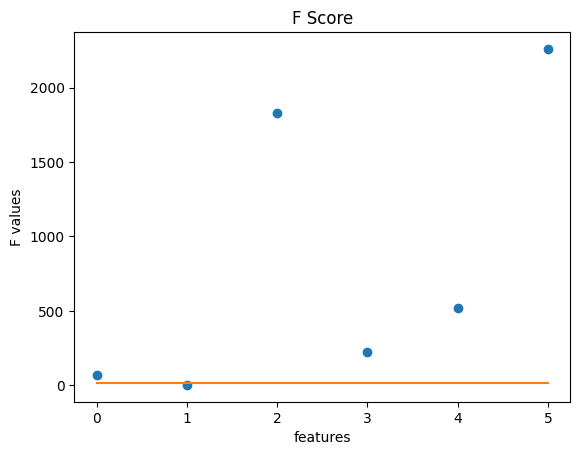

In [55]:
plt.figure()
plt.plot(F, 'o')
plt.plot(15*np.ones(len(F)))
plt.title('F Score')
plt.ylabel('F values')
plt.xlabel('features')

Text(0.5, 0, 'features')

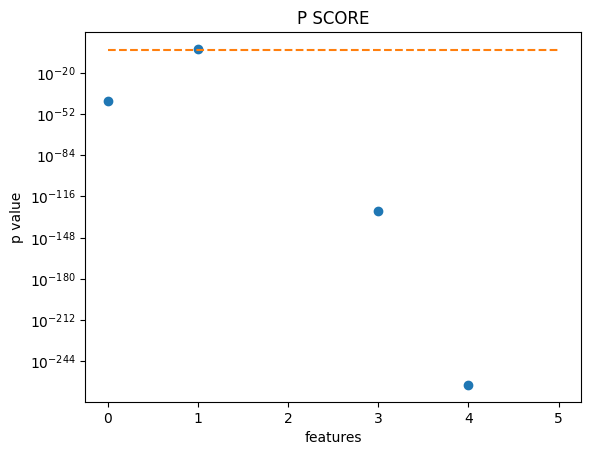

In [56]:
plt.figure()
plt.semilogy(p, 'o')
plt.semilogy(0.01*np.ones(len(p)), '--')
plt.title('P SCORE')
plt.ylabel('p value')
plt.xlabel('features')

In [57]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train_s, y_train)

Text(0.5, 0, 'features')

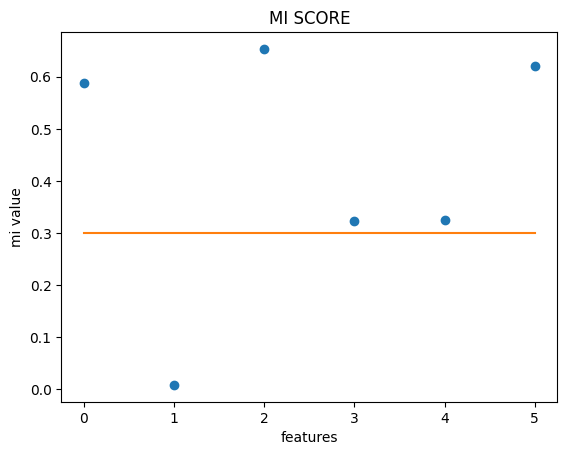

In [58]:
plt.figure()
plt.plot(mi, 'o')
plt.plot(0.3*np.ones(len(mi)))
plt.title('MI SCORE')
plt.ylabel('mi value')
plt.xlabel('features')

In [59]:
print('no. of significant features: {}'.format(len(p[((F>15)&(p<0.01))|(mi>0.3)])))

no. of significant features: 5


In [60]:
X_train_s.shape

(2540, 6)

In [61]:
X_train_s_r = X_train_s[:,(F > 15) | (mi > 0.3)]

In [62]:
X_train_s_r.shape

(2540, 5)

In [63]:
type(X_train_s_r)

numpy.ndarray

In [64]:
X_test_s_r = X_test_s[:,(F > 15) | (mi > 0.3)]

### Train 2 clustering techniques on features of the training dataset to generate cluster labels. Apply
### the clustering models on training and testing datasets. The two sets of cluster labels from the
### two techniques, respectively, should be used as 2 additional features. Do not leak information
### between training and testing datasets. Learn from train, apply on train and test. 

In [65]:
y_train.nunique()

4

In [66]:
y_test.nunique()

4

# So a total of 4 class labels

In [67]:
from sklearn.cluster import KMeans

In [68]:
kmeans = KMeans(n_clusters=4, random_state=10)

In [69]:
cluster_labels = kmeans.fit_predict(X_train_s_r)

C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [70]:
cluster_labels

array([2, 3, 3, ..., 1, 2, 1])

In [71]:
y_train

154     2
1390    1
1536    1
1152    2
16      0
       ..
1061    0
821     2
897     0
296     2
854     0
Name: Facies, Length: 2540, dtype: int32

In [72]:
kmeans_cluster_labels_test = kmeans.predict(X_test_s_r)

In [73]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [74]:
agglomerative = AgglomerativeClustering(n_clusters=4)

In [75]:
agglomerative_cluster_labels = agglomerative.fit_predict(X_train_s_r)


In [76]:
agglomerative_cluster_labels_test = agglomerative.fit_predict(X_test_s_r)

In [77]:
X_train_s_r_c = np.column_stack((X_train_s_r, cluster_labels, agglomerative_cluster_labels))

# Add cluster labels as additional features to the testing dataset
X_test_s_r_c = np.column_stack((X_test_s_r, kmeans_cluster_labels_test, agglomerative_cluster_labels_test))

In [78]:
X_train_s_r_c.shape

(2540, 7)

In [79]:
X_train_s_r_c

array([[-1.57673518,  0.22091113, -1.38117679, ...,  1.11759803,
         2.        ,  2.        ],
       [ 0.53976565,  1.54456794, -0.60485539, ...,  1.39850576,
         3.        ,  0.        ],
       [ 0.84777264,  1.1553115 , -0.34746108, ...,  0.89265354,
         3.        ,  0.        ],
       ...,
       [-0.49026629, -1.3334611 ,  0.97183959, ..., -0.90641015,
         1.        ,  1.        ],
       [-1.41633209,  0.2680177 , -1.54939901, ...,  0.65997998,
         2.        ,  2.        ],
       [-0.56888532, -1.21168996,  0.29403084, ..., -0.80949115,
         1.        ,  1.        ]])

In [122]:
type(X_train_s_r_c)

numpy.ndarray

# 3. Use all 9 techniques to build ML models for facies classification. Perform hyperparameter optimization, find the best performing model for each technique.
1. Logistic regression
2. K-Nearest Neighbor
3. Gaussian Naive Bayes
4. Support vector (linear)
5. Support vector (RBF)
6. Adaboost
7. Random forest
8. Gradient Boosting
9. Neural Network

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid_lr = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the model
lr = LogisticRegression()

# Perform hyperparameter optimization
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1_weighted', verbose=3)
grid_search_lr.fit(X_train_s_r_c, y_train)

# Get the best model
best_lr = grid_search_lr.best_estimator_

# Print best parameters found
print("Best parameters found for Logistic Regression:", grid_search_lr.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.772 total time=   0.0s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.770 total time=   0.0s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.748 total time=   0.0s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.760 total time=   0.0s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.750 total time=   0.0s
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l

C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
---------------------------------------------------

In [81]:
grid_search_lr.score(X_train_s_r_c, y_train)

0.8648393386796939

In [82]:
grid_search_lr.best_score_

0.862601277233531

In [83]:
y_train_pred_lr = grid_search_lr.predict(X_train_s_r_c)
y_test_pred_lr = grid_search_lr.predict(X_test_s_r_c)

In [84]:
from sklearn.metrics import f1_score

f1_score_train_lr = f1_score(y_train, y_train_pred_lr, average='weighted')
f1_score_test_lr = f1_score(y_test, y_test_pred_lr, average='weighted')

In [85]:
print("Memoriazation Performance:", f1_score_train_lr)
print("Generalization Performance:", f1_score_test_lr)

Memoriazation Performance: 0.8648393386796939
Generalization Performance: 0.8304918311500147


# KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameter grid
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}

# Initialize the model
knn = KNeighborsClassifier()

# Perform hyperparameter optimization
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_weighted', verbose=3)
grid_search_knn.fit(X_train_s_r_c, y_train)

# Get the best model
best_knn = grid_search_knn.best_estimator_

# Print best parameters found
print("Best parameters found for K-Nearest Neighbor:", grid_search_knn.best_params_)

# Evaluate the model
knn_train_pred = grid_search_knn.predict(X_train_s_r_c)
knn_test_pred = grid_search_knn.predict(X_test_s_r_c)

f1_score_train_knn = f1_score(y_train, knn_train_pred, average='weighted')
f1_score_test_knn = f1_score(y_test, knn_test_pred, average='weighted')

print("Memorization Performance:", f1_score_train_knn)
print("Generalization Performance:", f1_score_test_knn)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.895 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;, score=0.907 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.879 total time=   0.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.880 total time=   0.0s
[CV 5/5] END .....................n_neighbors=3;, score=0.871 total time=   0.0s
[CV 1/5] END .....................n_neighbors=5;, score=0.878 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5;, score=0.903 total time=   0.0s
[CV 3/5] END .....................n_neighbors=5;, score=0.873 total time=   0.0s
[CV 4/5] END .....................n_neighbors=5;, score=0.879 total time=   0.0s
[CV 5/5] END .....................n_neighbors=5;, score=0.859 total time=   0.0s
[CV 1/5] END .....................n_neighbors=7;, score=0.886 total time=   0.0s
[CV 2/5] END .....................n_neighbors=7;,

# GNB

In [87]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes classifier
nb = GaussianNB()

# Fit the model
nb.fit(X_train_s_r_c, y_train)

# Evaluate the model
nb_train_pred = nb.predict(X_train_s_r_c)
nb_test_pred = nb.predict(X_test_s_r_c)


f1_score_train_nb = f1_score(y_train, nb_train_pred, average='weighted')
f1_score_test_nb = f1_score(y_test, nb_test_pred, average='weighted')

print("Memorization Performance:", f1_score_train_nb)
print("Generalization Performance:", f1_score_test_nb)


Memorization Performance: 0.8224186614458429
Generalization Performance: 0.7698433049477661


# SVC Linear

In [88]:
from sklearn.svm import SVC

# Define the hyperparameter grid
param_grid_svm_linear = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the model
svm_linear = SVC(kernel='linear', probability=True)

# Perform hyperparameter optimization
grid_search_svm_linear = GridSearchCV(svm_linear, param_grid_svm_linear, cv=5, scoring='f1_weighted', verbose=3)
grid_search_svm_linear.fit(X_train_s_r_c, y_train)

# Get the best model
best_svm_linear = grid_search_svm_linear.best_estimator_

# Print best parameters found
print("Best parameters found for Support vector (linear):", grid_search_svm_linear.best_params_)

# Evaluate the model
svm_linear_train_pred = grid_search_svm_linear.predict(X_train_s_r_c)
svm_linear_test_pred = grid_search_svm_linear.predict(X_test_s_r_c)

f1_score_train_svm_linear = f1_score(y_train, svm_linear_train_pred, average='weighted')
f1_score_test_svm_linear = f1_score(y_test, svm_linear_test_pred, average='weighted')

print("Memorization Performance:", f1_score_train_svm_linear)
print("Generalization Performance:", f1_score_test_svm_linear)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...........................C=0.001;, score=0.792 total time=   0.3s
[CV 2/5] END ...........................C=0.001;, score=0.791 total time=   0.3s
[CV 3/5] END ...........................C=0.001;, score=0.762 total time=   0.2s
[CV 4/5] END ...........................C=0.001;, score=0.756 total time=   0.3s
[CV 5/5] END ...........................C=0.001;, score=0.771 total time=   0.2s
[CV 1/5] END ............................C=0.01;, score=0.833 total time=   0.1s
[CV 2/5] END ............................C=0.01;, score=0.822 total time=   0.1s
[CV 3/5] END ............................C=0.01;, score=0.789 total time=   0.1s
[CV 4/5] END ............................C=0.01;, score=0.828 total time=   0.1s
[CV 5/5] END ............................C=0.01;, score=0.809 total time=   0.1s
[CV 1/5] END .............................C=0.1;, score=0.846 total time=   0.1s
[CV 2/5] END .............................C=0.1;,

# SVC RBF

In [89]:
# Continue from the previous block of code

# Define the hyperparameter grid
param_grid_svm_rbf = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the model
svm_rbf = SVC(kernel='rbf', probability=True)

# Perform hyperparameter optimization
grid_search_svm_rbf = GridSearchCV(svm_rbf, param_grid_svm_rbf, cv=5, scoring='f1_weighted', verbose=3)
grid_search_svm_rbf.fit(X_train_s_r_c, y_train)

# Get the best model
best_svm_rbf = grid_search_svm_rbf.best_estimator_

# Print best parameters found
print("Best parameters found for Support vector (RBF):", grid_search_svm_rbf.best_params_)

# Evaluate the model
svm_rbf_train_pred = grid_search_svm_rbf.predict(X_train_s_r_c)
svm_rbf_test_pred = grid_search_svm_rbf.predict(X_test_s_r_c)

f1_score_train_svm_rbf = f1_score(y_train, svm_rbf_train_pred, average='weighted')
f1_score_test_svm_rbf = f1_score(y_test, svm_rbf_test_pred, average='weighted')

print("Memorization Performance:", f1_score_train_svm_rbf)
print("Generalization Performance:", f1_score_test_svm_rbf)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...........................C=0.001;, score=0.217 total time=   1.7s
[CV 2/5] END ...........................C=0.001;, score=0.217 total time=   1.6s
[CV 3/5] END ...........................C=0.001;, score=0.215 total time=   1.6s
[CV 4/5] END ...........................C=0.001;, score=0.217 total time=   1.5s
[CV 5/5] END ...........................C=0.001;, score=0.217 total time=   1.5s
[CV 1/5] END ............................C=0.01;, score=0.802 total time=   1.2s
[CV 2/5] END ............................C=0.01;, score=0.812 total time=   1.0s
[CV 3/5] END ............................C=0.01;, score=0.762 total time=   0.9s
[CV 4/5] END ............................C=0.01;, score=0.796 total time=   0.7s
[CV 5/5] END ............................C=0.01;, score=0.777 total time=   0.8s
[CV 1/5] END .............................C=0.1;, score=0.840 total time=   0.4s
[CV 2/5] END .............................C=0.1;,

# Adaboost

In [90]:
from sklearn.ensemble import AdaBoostClassifier

# Define the hyperparameter grid
param_grid_adaboost = {'n_estimators': [50, 100, 200],
                       'learning_rate': [0.01, 0.1, 1]}

# Initialize the model
adaboost = AdaBoostClassifier()

# Perform hyperparameter optimization
grid_search_adaboost = GridSearchCV(adaboost, param_grid_adaboost, cv=5, scoring='f1_weighted', verbose=3)
grid_search_adaboost.fit(X_train_s_r_c, y_train)

# Get the best model
best_adaboost = grid_search_adaboost.best_estimator_

# Print best parameters found
print("Best parameters found for Adaboost:", grid_search_adaboost.best_params_)

# Evaluate the model
adaboost_train_pred = grid_search_adaboost.predict(X_train_s_r_c)
adaboost_test_pred = grid_search_adaboost.predict(X_test_s_r_c)

f1_score_train_adaboost = f1_score(y_train, adaboost_train_pred, average='weighted')
f1_score_test_adaboost = f1_score(y_test, adaboost_test_pred, average='weighted')

print("Memorization Performance:", f1_score_train_adaboost)
print("Generalization Performance:", f1_score_test_adaboost)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.839 total time=   0.1s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.837 total time=   0.2s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.826 total time=   0.1s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.826 total time=   0.1s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.829 total time=   0.1s
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=0.844 total time=   0.3s
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=0.827 total time=   0.4s
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=0.830 total time=   0.3s
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=0.828 total time=   0.3s
[CV 1/5] END learning_rate=0.01, n_estimators=200;, score=0.847 total time=   0.8s
[CV 2/5] END learning_rate=0.01,

# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Initialize the model
rf = RandomForestClassifier()

# Perform hyperparameter optimization
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_weighted', verbose=3)
grid_search_rf.fit(X_train_s_r_c, y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_

# Print best parameters found
print("Best parameters found for Random forest:", grid_search_rf.best_params_)

# Evaluate the model
rf_train_pred = grid_search_rf.predict(X_train_s_r_c)
rf_test_pred = grid_search_rf.predict(X_test_s_r_c)

f1_score_train_rf = f1_score(y_train, rf_train_pred, average='weighted')
f1_score_test_rf = f1_score(y_test, rf_test_pred, average='weighted')

print("Memorization Performance:", f1_score_train_rf)
print("Generalization Performance:", f1_score_test_rf)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.891 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.914 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.909 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.888 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.885 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.909 total time=   0.3s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.919 total time=   0.3s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.903 to

# Gradient Boosting

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameter grid
param_grid_gb = {'n_estimators': [50, 100, 200],
                 'learning_rate': [0.01, 0.1, 1],
                 'max_depth': [3, 5, 7]}

# Initialize the model
gb = GradientBoostingClassifier()

# Perform hyperparameter optimization
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='f1_weighted', verbose=3)
grid_search_gb.fit(X_train_s_r_c, y_train)

# Get the best model
best_gb = grid_search_gb.best_estimator_

# Print best parameters found
print("Best parameters found for Gradient Boosting:", grid_search_gb.best_params_)

# Evaluate the model
gb_train_pred = grid_search_gb.predict(X_train_s_r_c)
gb_test_pred = grid_search_gb.predict(X_test_s_r_c)

f1_score_train_gb = f1_score(y_train, gb_train_pred, average='weighted')
f1_score_test_gb = f1_score(y_test, gb_test_pred, average='weighted')

print("Memorization Performance:", f1_score_train_gb)
print("Generalization Performance:", f1_score_test_gb)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.856 total time=   1.5s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.878 total time=   1.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.853 total time=   1.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.851 total time=   1.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.850 total time=   1.2s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.863 total time=   2.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.890 total time=   2.4s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.855 total time=   2.6s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.855 total time=   2.4s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.854 to

# Neural Network

In [93]:
from sklearn.neural_network import MLPClassifier

# Define the hyperparameter grid
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                  'activation': ['relu', 'tanh', 'logistic'],
                  'alpha': [0.0001, 0.001, 0.01]}

# Initialize the model
mlp = MLPClassifier(max_iter=1000)

# Perform hyperparameter optimization
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='f1_weighted', verbose=3)
grid_search_mlp.fit(X_train_s_r_c, y_train)

# Get the best model
best_mlp = grid_search_mlp.best_estimator_

# Print best parameters found
print("Best parameters found for Neural Network:", grid_search_mlp.best_params_)

# Evaluate the model
mlp_train_pred = grid_search_mlp.predict(X_train_s_r_c)
mlp_test_pred = grid_search_mlp.predict(X_test_s_r_c)

f1_score_train_mlp = f1_score(y_train, mlp_train_pred, average='weighted')
f1_score_test_mlp = f1_score(y_test, mlp_test_pred, average='weighted')

print("Memorization Performance:", f1_score_train_mlp)
print("Generalization Performance:", f1_score_test_mlp)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,);, score=0.904 total time=   2.4s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,);, score=0.916 total time=   2.7s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,);, score=0.897 total time=   2.5s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,);, score=0.889 total time=   2.3s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,);, score=0.881 total time=   2.5s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,);, score=0.911 total time=   3.3s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,);, score=0.916 total time=   2.8s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,);, score=0.891 total time=   3.3s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,);, score=0.903 total time=   1.9s
[CV 5/5] END act

C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50);, score=0.870 total time=  17.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,);, score=0.903 total time=   3.7s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,);, score=0.912 total time=   3.9s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,);, score=0.897 total time=   5.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,);, score=0.893 total time=   3.7s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,);, score=0.875 total time=   4.6s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,);, score=0.896 total time=   4.7s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,);, score=0.912 total time=   6.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,);, score=0.899 total time=   7.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,);, score=0.903 t

C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50);, score=0.906 total time=  17.6s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50);, score=0.905 total time=   9.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50);, score=0.900 total time=   5.3s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50);, score=0.877 total time=  13.4s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,);, score=0.905 total time=   3.8s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,);, score=0.914 total time=   5.5s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,);, score=0.904 total time=   5.0s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,);, score=0.895 total time=   3.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,);, score=0.882 total time=   5.8s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=0.886 to

C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,);, score=0.890 total time=   7.8s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,);, score=0.908 total time=   6.8s


C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,);, score=0.891 total time=   7.4s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,);, score=0.908 total time=   6.9s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,);, score=0.884 total time=   5.9s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,);, score=0.896 total time=  11.9s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,);, score=0.905 total time=   8.5s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,);, score=0.903 total time=   8.8s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,);, score=0.903 total time=  11.3s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,);, score=0.883 total time=   9.4s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50);, score=0.876 total time=   8.4s
[CV 2/5] END activation=logistic, alph

C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50);, score=0.876 total time=  18.3s


C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,);, score=0.898 total time=   7.3s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,);, score=0.915 total time=   4.8s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,);, score=0.899 total time=   6.8s


C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,);, score=0.905 total time=   7.6s


C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,);, score=0.883 total time=   7.7s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,);, score=0.886 total time=   8.3s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,);, score=0.914 total time=   9.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,);, score=0.898 total time=   8.9s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,);, score=0.906 total time=  11.9s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,);, score=0.890 total time=  12.4s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50);, score=0.876 total time=  11.4s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50);, score=0.912 total time=  11.9s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50);, score=0.890 total time=   5.7s
[CV 4/5] END activation=logistic, alpha=0

### Evaluate the classifiers using 3 sklearn metrics, F1 score, Area under the Curve, and Matthews correlation coefficient. Can the metrics take care of class imbalance? Try to ensure the metrics take care of class imbalance. Which is the best metric for the desired task given the class imbalance? –

In [94]:
from sklearn.metrics import f1_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import label_binarize

# Define a function to evaluate the model
def evaluate_model(y_true, model, X_test, y_pred):
    #y_pred = model.predict(X_test)  # Predicted labels
    y_scores = model.predict_proba(X_test)  # Probability scores
    

    f1 = f1_score(y_true, y_pred, average='weighted')
    auc = roc_auc_score(label_binarize(y_true, classes=np.unique(y_true)), y_scores, average='weighted', multi_class='ovr')
    mcc = matthews_corrcoef(y_true, y_pred)
    return f1, auc, mcc

# Example of evaluating a Logistic Regression model
f1_lr, auc_lr, mcc_lr = evaluate_model(y_test, best_lr, X_test_s_r_c, y_test_pred_lr)
print("Logistic Regression:")
print("F1 Score:", f1_lr)
print("AUC:", auc_lr)
print("MCC:", mcc_lr)

Logistic Regression:
F1 Score: 0.8304918311500147
AUC: 0.9531839827792911
MCC: 0.7581253577009252


In [95]:
f1_knn, auc_knn, mcc_knn = evaluate_model(y_test, best_knn, X_test_s_r_c, knn_test_pred)
print("\nK-Nearest Neighbor:")
print("F1 Score:", f1_knn)
print("AUC:", auc_knn)
print("MCC:", mcc_knn)



K-Nearest Neighbor:
F1 Score: 0.8531609084876551
AUC: 0.9420016335599873
MCC: 0.7894124413510375


In [96]:
f1_nb, auc_nb, mcc_nb = evaluate_model(y_test, nb, X_test_s_r_c, nb_test_pred)
print("\nGB:")
print("F1 Score:", f1_nb)
print("AUC:", auc_nb)
print("MCC:", mcc_nb)


GB:
F1 Score: 0.7698433049477661
AUC: 0.9416550999625097
MCC: 0.6605233199640133


In [97]:
f1_svclin, auc_svclin, mcc_svclin = evaluate_model(y_test, best_svm_linear, X_test_s_r_c, svm_linear_test_pred)
print("\nSVC Linear:")
print("F1 Score:", f1_svclin)
print("AUC:", auc_svclin)
print("MCC:", mcc_svclin)


SVC Linear:
F1 Score: 0.8355202283575204
AUC: 0.9563870080160749
MCC: 0.7675522557456067


In [98]:
f1_svcrbf, auc_svcrbf, mcc_svcrbf = evaluate_model(y_test, best_svm_rbf, X_test_s_r_c, svm_rbf_test_pred)
print("\nK-SVC RBF:")
print("F1 Score:", f1_svcrbf)
print("AUC:", auc_svcrbf)
print("MCC:", mcc_svcrbf)


K-SVC RBF:
F1 Score: 0.8606821861795949
AUC: 0.9764651684452605
MCC: 0.8031364530555577


In [99]:
f1_svcada, auc_svcada, mcc_svcada = evaluate_model(y_test, best_adaboost, X_test_s_r_c, adaboost_test_pred)
print("\nAdaboost:")
print("F1 Score:", f1_svcada)
print("AUC:", auc_svcada)
print("MCC:", mcc_svcada)


Adaboost:
F1 Score: 0.8225398587537951
AUC: 0.8985495134665645
MCC: 0.7623038913187057


In [100]:
f1_svcrf, auc_svcrf, mcc_svcrf = evaluate_model(y_test, best_rf, X_test_s_r_c, rf_test_pred)
print("\nRF:")
print("F1 Score:", f1_svcrf)
print("AUC:", auc_svcrf)
print("MCC:", mcc_svcrf)


RF:
F1 Score: 0.8769985846546079
AUC: 0.9757557194652712
MCC: 0.8215095712150706


In [101]:
f1_svcgb, auc_svcgb, mcc_svcgb = evaluate_model(y_test, best_gb, X_test_s_r_c, gb_test_pred)
print("\nGB:")
print("F1 Score:", f1_svcgb)
print("AUC:", auc_svcgb)
print("MCC:", mcc_svcgb)


GB:
F1 Score: 0.8831942232020688
AUC: 0.9757035061732547
MCC: 0.8311335799800698


In [102]:
f1_svcmlp, auc_svcmlp, mcc_svcmlp = evaluate_model(y_test, best_mlp, X_test_s_r_c, mlp_test_pred)
print("\nMLP:")
print("F1 Score:", f1_svcmlp)
print("AUC:", auc_svcmlp)
print("MCC:", mcc_svcmlp)


MLP:
F1 Score: 0.8626188374901812
AUC: 0.9731393637215419
MCC: 0.8006224472554867


### Best metric used for evaluation: MCC indicates a more balanced performance with regard to class imbalance. It considers all the quadrants of the confusion matrix and doesn't indicate any bias towards any class. Hence we took MCC as a measurement metric to decide on the best performing model.
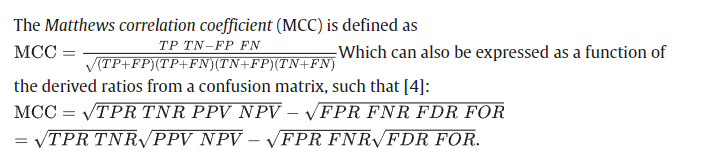

### Source: https://www.sciencedirect.com/science/article/abs/pii/S016786552030115X

In [103]:
# Store the MCC scores with model names
mcc_scores = {
    "Logistic Regression": mcc_lr,
    "K-Nearest Neighbors": mcc_knn,
    "Naive Bayes": mcc_nb,
    "SVC Linear": mcc_svclin,
    "SVC RBF": mcc_svcrbf,
    "Adaboost": mcc_svcada,
    "Random Forest": mcc_svcrf,
    "Gradient Boosting": mcc_svcgb,
    "MLP": mcc_svcmlp
}

# Find the model with the highest MCC score
best_model = max(mcc_scores, key=mcc_scores.get)
best_mcc_score = mcc_scores[best_model]

print(f"The model with the highest MCC score is {best_model} with an MCC of {best_mcc_score:.4f}.")


The model with the highest MCC score is Gradient Boosting with an MCC of 0.8311.


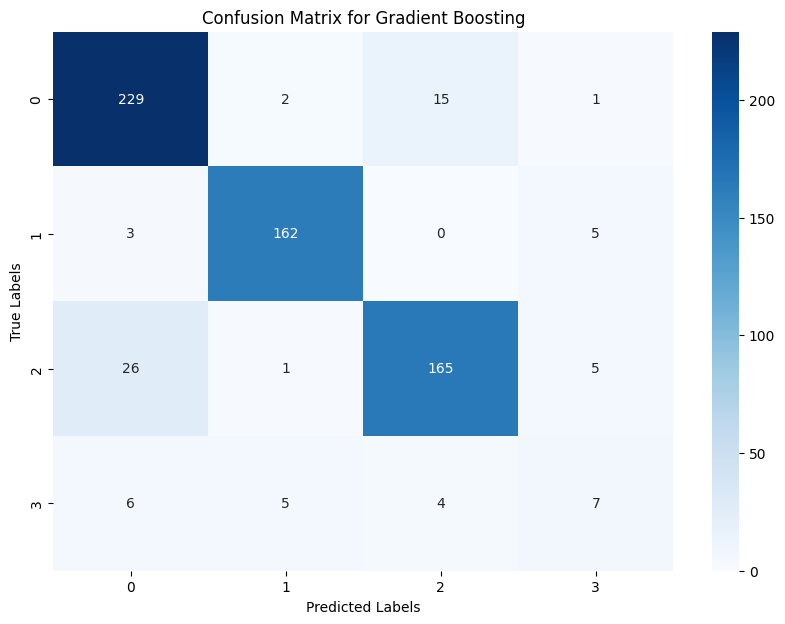

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'gb_test_pred' are the predicted labels from the best Gradient Boosting model
# and 'y_test' are the true labels
cm = confusion_matrix(y_test, gb_test_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Easy to predict and Hard to Predict:
#### Class 0 (CB) has 229 correct predictions and minor misclassifications. It shows a high accuracy in prediction and it is very easy to predict. Class 1 (SH) has 162 predictions and few minor misclassifications making it also easy to predict. Class 2 (SS) shows 165 correct predictions and class 3 (UN) has 22 misclassifications indicating that it is the hardest to predict.

#### Class 3 (UN) is the hardest to predict

# Question 2: Based on the metrics used above, find 3 top performing models (sufficiently different hyperparameters or belong to different techniques).
• Deploy the 3 top performing models on Well 1. When deploying, ensure all feature engineering
and preprocessing is performed in the right sequence/order. Well 1 needs to be used for only
deployment. – 1
• Plot the variations in predictions of the 3 top performing models on Well 1 as a function of
depth. – 1
• Export the mean and range (max-min) of predictions for Well 1 along with depth and GR log to a
separate XLS file (Prediction.xlsx). – 1


In [105]:
# Assuming 'mcc_scores' is a dictionary containing the MCC scores for each model
mcc_scores = {
    "Logistic Regression": mcc_lr,
    "K-Nearest Neighbors": mcc_knn,
    "Naive Bayes": mcc_nb,
    "SVC Linear": mcc_svclin,
    "SVC RBF": mcc_svcrbf,
    "Adaboost": mcc_svcada,
    "Random Forest": mcc_svcrf,
    "Gradient Boosting": mcc_svcgb,
    "MLP": mcc_svcmlp
}

# Sort the models based on their MCC scores in descending order
top_models = sorted(mcc_scores.items(), key=lambda x: x[1], reverse=True)[:3]

# Print the top 3 models with the highest MCC scores
for model, score in top_models:
    print(f"Model: {model}, MCC Score: {score:.4f}")


Model: Gradient Boosting, MCC Score: 0.8311
Model: Random Forest, MCC Score: 0.8215
Model: SVC RBF, MCC Score: 0.8031


In [113]:
top_models

[('Gradient Boosting', 0.8311335799800698),
 ('Random Forest', 0.8215095712150706),
 ('SVC RBF', 0.8031364530555577)]

In [120]:
import pickle

# Export the label encoder
with open('to_drop.pkl', 'wb') as file:
    pickle.dump(to_drop, file)

# Export the Quantile Transformer
with open('quantile_transformer.pkl', 'wb') as file:
    pickle.dump(quantile_transformer, file)

# Export the Standard Scaler
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(scl, file)

# Export KMeans clustering model
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

# Export Agglomerative clustering model
with open('agglomerative_model.pkl', 'wb') as file:
    pickle.dump(agglomerative, file)

    
# Save F-score and MI data
feature_selection_scores = {
    'F_score': F,
    'p_values': p,
    'mi_score': mi
}

with open('feature_selection_scores.pkl', 'wb') as f:
    pickle.dump(feature_selection_scores, f)

In [115]:
import pickle

# Dictionary mapping model names to their corresponding GridSearchCV objects
model_objects = {
    "Logistic Regression": grid_search_lr,
    "K-Nearest Neighbors": grid_search_knn,
    "Naive Bayes": nb,  # Assuming 'nb' is the trained GaussianNB model object
    "SVC Linear": grid_search_svm_linear,
    "SVC RBF": grid_search_svm_rbf,
    "Adaboost": grid_search_adaboost,
    "Random Forest": grid_search_rf,
    "Gradient Boosting": grid_search_gb,
    "MLP": grid_search_mlp
}



# Save the top three models
for i, (model_name, _) in enumerate(top_models, start=1):
    model_to_save = model_objects[model_name]  # Get the model object from the dictionary
    file_name = f"model{i}.pkl"  # Dynamic file name based on rank
    with open(file_name, 'wb') as file:
        pickle.dump(model_to_save, file)
        print(f"Saved {model_name} model as {file_name}")


Saved Gradient Boosting model as model1.pkl
Saved Random Forest model as model2.pkl
Saved SVC RBF model as model3.pkl


In [130]:
top_4 = sorted(mcc_scores.items(), key=lambda x: x[1], reverse=True)[:4]

In [131]:
top_4

[('Gradient Boosting', 0.8311335799800698),
 ('Random Forest', 0.8215095712150706),
 ('SVC RBF', 0.8031364530555577),
 ('MLP', 0.8006224472554867)]